In [12]:
import matplotlib.pyplot as plt
import os 
import pytesseract
import numpy as np 
import cv2
import pandas as pd 
import IPython.display as ipd
import cv2

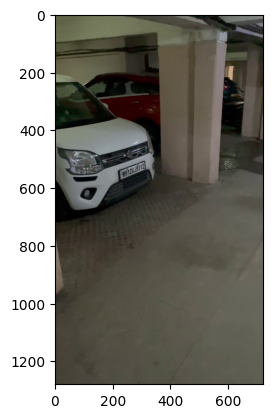

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [10]:
import cv2
from matplotlib import pyplot as plt
import imutils
import easyocr
import numpy as np 
import os 
import pandas as pd 
import IPython.display as ipd
import pytesseract

# Load the pre-trained Haar cascade for Russian license plates
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# Open the video capture (replace 'car2.mp4' with your video file or live feed)
video_capture = cv2.VideoCapture('car2.mp4')

text_detection_img = None  # The image used to read the number plate

if not video_capture.isOpened():
    print("Error: Could not open video capture.")
else:
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("End of video.")
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect license plates in the frame
        plates = plate_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Check if license plate(s) are detected
        if len(plates) > 0:
            text_detection_img = frame

            # Display the original frame using matplotlib
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.show()

            # Stop processing after identifying one frame
            break

    video_capture.release()
    cv2.destroyAllWindows()

if text_detection_img is not None:
    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(text_detection_img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Now you can run your number plate reading and object detection scripts on text_detection_img


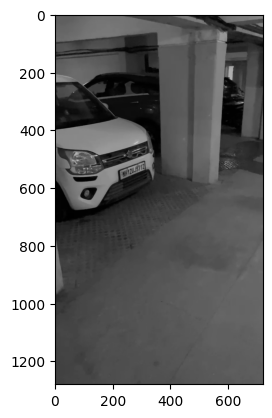

In [11]:
img = text_detection_img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

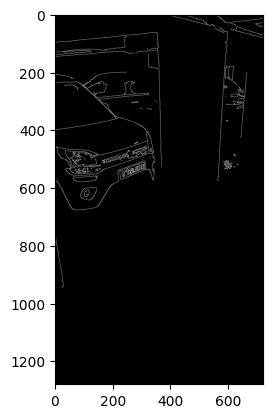

In [12]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [13]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [15]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx)==4:
        location = approx
        break

In [16]:
location

array([[[309, 512]],

       [[226, 541]],

       [[227, 572]],

       [[310, 539]]], dtype=int32)

In [17]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

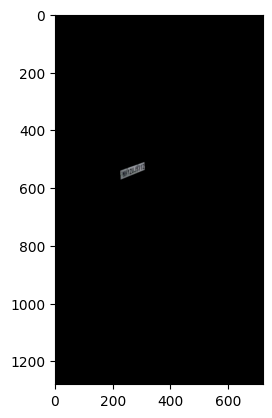

In [18]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [19]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

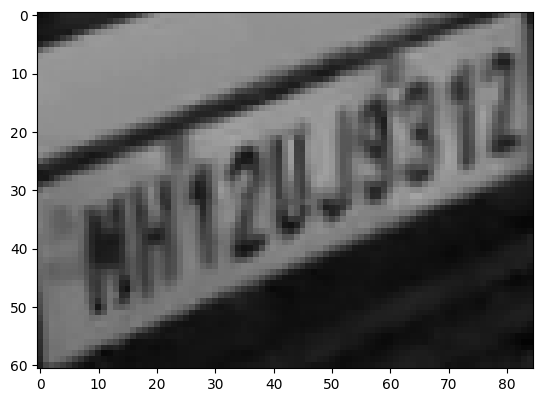

In [21]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [45]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[-6.577708763999663, 29.211145618000167],
   [84.16421193645022, -2.446990564188171],
   [94.57770876399967, 27.788854381999833],
   [2.835788063549779, 60.44699056418817]],
  'Wium',
  0.07617178559303284)]